# Bias Variance Tradeoff

In this notebook we investigate the bias and variance of models. In the first section we'll investigate fitting functions of the form:

$$f(x) = a + b * x^n$$

to some cubic data with noise.

In [1]:
% matplotlib inline
from __future__ import print_function
import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
# from sklearn import datasets, linear_model
import statsmodels.api as sm

## Some helper functions
The following functions will generate data and polynomial values.

In [2]:
def polynomials(X, degree=1):
    # See also numpy.vander
    array = [X]
    y = X
    for i in range(2, int(degree + 1)):
        y = y * X
        array.append(y)
    return np.array(array).transpose()

def monomials(X, degree=1):
    y = np.array(X)
    y = np.power(X, degree)
    return np.array([y]).transpose()

def generate_data(func, a, b, n=100):
    data = []
    for _ in range(n):
        x = random.random() * (b - a)
        y = func(x)
        data.append((x, y))
    return list(sorted(data))

In [3]:
X = np.array(range(10))
polynomials(X, 3)

array([[  0,   0,   0],
       [  1,   1,   1],
       [  2,   4,   8],
       [  3,   9,  27],
       [  4,  16,  64],
       [  5,  25, 125],
       [  6,  36, 216],
       [  7,  49, 343],
       [  8,  64, 512],
       [  9,  81, 729]])

In [4]:
mu, sigma = 0, 0.1 # mean and standard deviation
# norm = np.random.normal(mu, sigma)

# Generate some data
f = lambda x: 4 + 5 * x - 3 * x*x + 0.1 * x * x * x + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2, n=20)

## Fitting Polynomial Functions

Here we fit try to fit our sample data with an increasing exponent:

$$f(x) = 1 + b x^n$$

None of these models are quite right because the data is generate from the function

$$ \hat{f}(x) = 4 + 5 x - 3 x^2 + 0.1 x^3$$

So each model is not quite right because one or more terms is missing. This will allow us to take a closer look at the bias-variance tradeoff.

Let's start with $n = 1, 2, 3, 4$.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     24.07
Date:                Tue, 20 Dec 2016   Prob (F-statistic):           9.81e-05
Time:                        08:15:57   Log-Likelihood:                -53.380
No. Observations:                  20   AIC:                             108.8
Df Residuals:                      19   BIC:                             109.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.7653      0.767      4.906      0.0

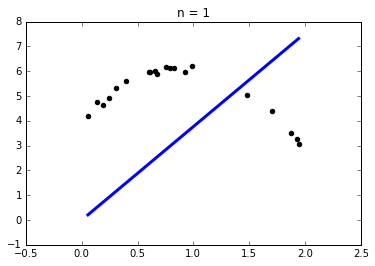

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     7.428
Date:                Tue, 20 Dec 2016   Prob (F-statistic):             0.0134
Time:                        08:15:57   Log-Likelihood:                -58.264
No. Observations:                  20   AIC:                             118.5
Df Residuals:                      19   BIC:                             119.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.6493      0.605      2.726      0.0

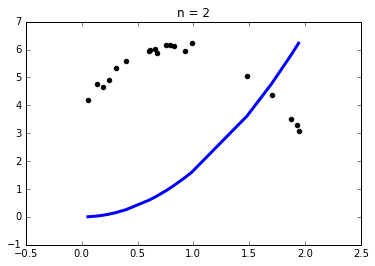

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     4.013
Date:                Tue, 20 Dec 2016   Prob (F-statistic):             0.0596
Time:                        08:15:58   Log-Likelihood:                -59.648
No. Observations:                  20   AIC:                             121.3
Df Residuals:                      19   BIC:                             122.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7206      0.360      2.003      0.0

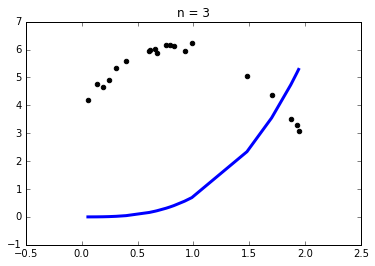

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     2.856
Date:                Tue, 20 Dec 2016   Prob (F-statistic):              0.107
Time:                        08:15:58   Log-Likelihood:                -60.164
No. Observations:                  20   AIC:                             122.3
Df Residuals:                      19   BIC:                             123.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.3358      0.199      1.690      0.1

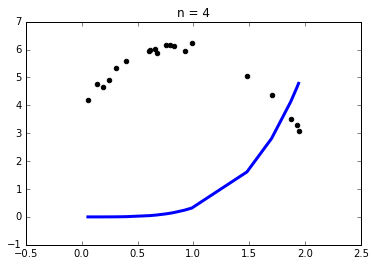

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     2.340
Date:                Tue, 20 Dec 2016   Prob (F-statistic):              0.143
Time:                        08:15:58   Log-Likelihood:                -60.403
No. Observations:                  20   AIC:                             122.8
Df Residuals:                      19   BIC:                             123.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.1637      0.107      1.530      0.1

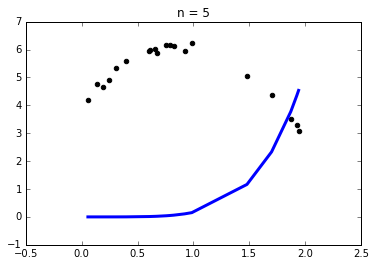

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     2.057
Date:                Tue, 20 Dec 2016   Prob (F-statistic):              0.168
Time:                        08:15:58   Log-Likelihood:                -60.536
No. Observations:                  20   AIC:                             123.1
Df Residuals:                      19   BIC:                             124.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0817      0.057      1.434      0.1

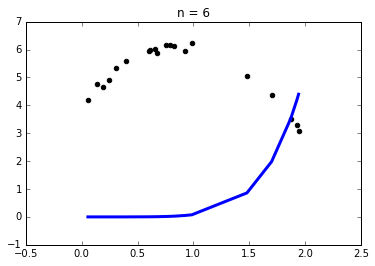

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     1.876
Date:                Tue, 20 Dec 2016   Prob (F-statistic):              0.187
Time:                        08:15:58   Log-Likelihood:                -60.622
No. Observations:                  20   AIC:                             123.2
Df Residuals:                      19   BIC:                             124.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0413      0.030      1.370      0.1

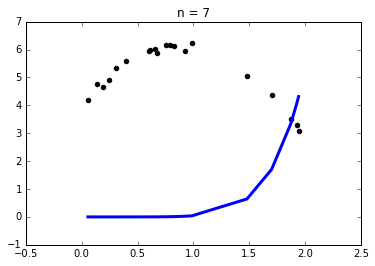

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.745
Date:                Tue, 20 Dec 2016   Prob (F-statistic):              0.202
Time:                        08:15:58   Log-Likelihood:                -60.685
No. Observations:                  20   AIC:                             123.4
Df Residuals:                      19   BIC:                             124.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0210      0.016      1.321      0.2

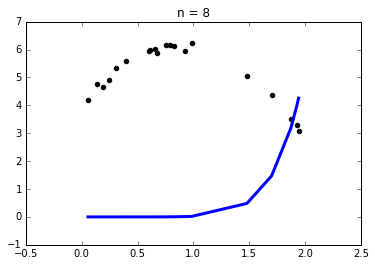

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     1.644
Date:                Tue, 20 Dec 2016   Prob (F-statistic):              0.215
Time:                        08:15:59   Log-Likelihood:                -60.734
No. Observations:                  20   AIC:                             123.5
Df Residuals:                      19   BIC:                             124.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0107      0.008      1.282      0.2

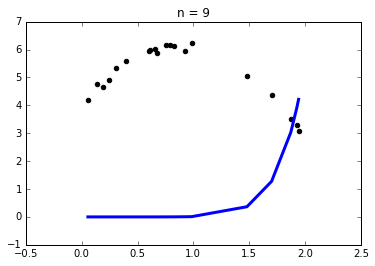

In [5]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = monomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    print(regr.summary())

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

It's important to note that the true measures of bias and variance are averaged over many fits to many samples from the same data source, and we're only looking at one instance here. Notice that the bias is at first decreasing as the exponent increases, but at $n=6$ we see the bias start to increase while the squared errors are basically unchanged. Let's make a plot of the bias as the exponent increases.

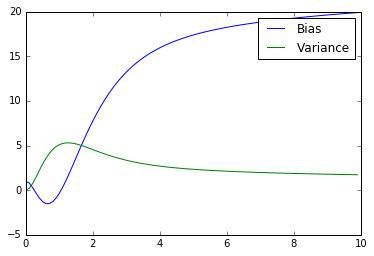

In [6]:
bs = []
vars = []
exps = np.arange(0, 10, 0.1)

for i in exps:
    X = monomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Just as in the conceptual diagram from the lesson, there's a spot where the bias is minimized around $n=5$.

# Variance

Now let's try to fit the full polynomial as the degree increases, which will help us visualize variance error.

**Check**: In the next code section, what changes when compared to the code above?

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     24.07
Date:                Tue, 20 Dec 2016   Prob (F-statistic):           9.81e-05
Time:                        08:16:16   Log-Likelihood:                -53.380
No. Observations:                  20   AIC:                             108.8
Df Residuals:                      19   BIC:                             109.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.7653      0.767      4.906      0.0

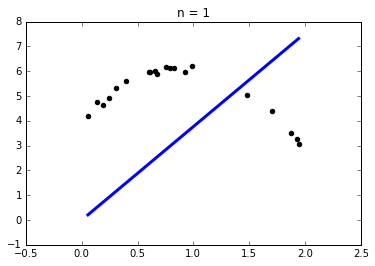

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     111.7
Date:                Tue, 20 Dec 2016   Prob (F-statistic):           7.11e-11
Time:                        08:16:16   Log-Likelihood:                -35.601
No. Observations:                  20   AIC:                             75.20
Df Residuals:                      18   BIC:                             77.19
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            13.4076      1.075     12.473      0.0

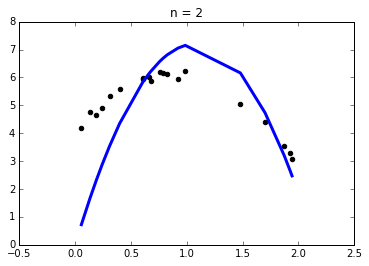

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     135.8
Date:                Tue, 20 Dec 2016   Prob (F-statistic):           4.48e-12
Time:                        08:16:16   Log-Likelihood:                -29.393
No. Observations:                  20   AIC:                             64.79
Df Residuals:                      17   BIC:                             67.77
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            21.4848      2.262      9.498      0.0

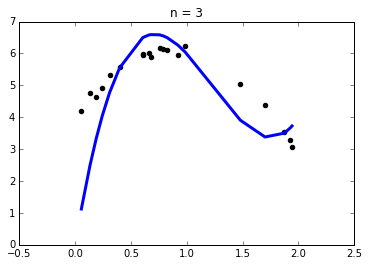

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     196.1
Date:                Tue, 20 Dec 2016   Prob (F-statistic):           2.25e-13
Time:                        08:16:16   Log-Likelihood:                -22.439
No. Observations:                  20   AIC:                             52.88
Df Residuals:                      16   BIC:                             56.86
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            31.9562      3.088     10.349      0.0

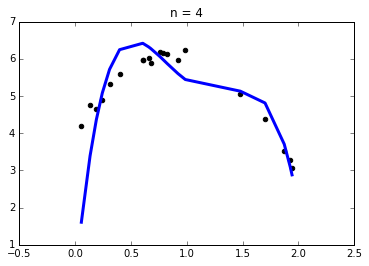

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     233.8
Date:                Tue, 20 Dec 2016   Prob (F-statistic):           1.13e-13
Time:                        08:16:16   Log-Likelihood:                -17.876
No. Observations:                  20   AIC:                             45.75
Df Residuals:                      15   BIC:                             50.73
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            42.1625      4.296      9.815      0.0

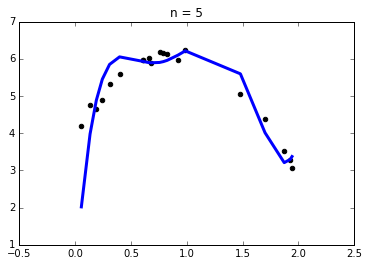

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     280.8
Date:                Tue, 20 Dec 2016   Prob (F-statistic):           9.17e-14
Time:                        08:16:16   Log-Likelihood:                -13.579
No. Observations:                  20   AIC:                             39.16
Df Residuals:                      14   BIC:                             45.13
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            53.8092      5.560      9.678      0.0

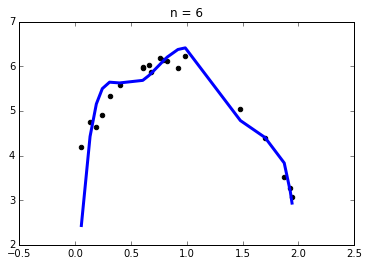

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     394.9
Date:                Tue, 20 Dec 2016   Prob (F-statistic):           4.16e-14
Time:                        08:16:17   Log-Likelihood:                -7.9217
No. Observations:                  20   AIC:                             29.84
Df Residuals:                      13   BIC:                             36.81
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            72.0573      7.251      9.937      0.0

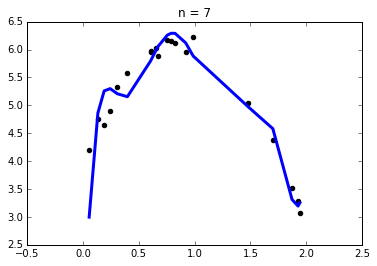

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     470.8
Date:                Tue, 20 Dec 2016   Prob (F-statistic):           8.55e-14
Time:                        08:16:17   Log-Likelihood:                -4.0421
No. Observations:                  20   AIC:                             24.08
Df Residuals:                      12   BIC:                             32.05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            84.5332      8.125     10.404      0.0

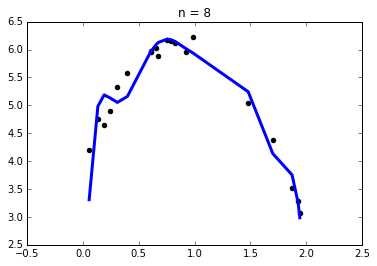

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     958.8
Date:                Tue, 20 Dec 2016   Prob (F-statistic):           1.29e-14
Time:                        08:16:17   Log-Likelihood:                 5.0990
No. Observations:                  20   AIC:                             7.802
Df Residuals:                      11   BIC:                             16.76
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1           107.3713      7.784     13.793      0.0

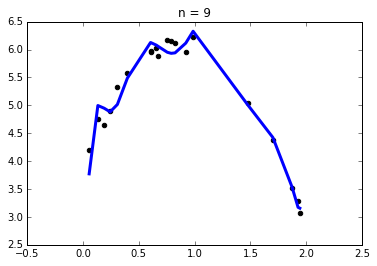

In [9]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = polynomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # The coefficients
    print(regr.summary())

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

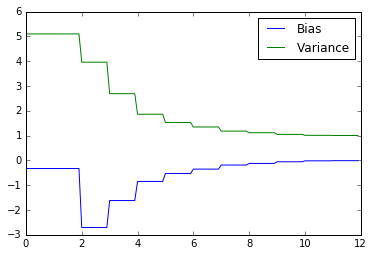

In [8]:
bs = []
vars = []
exps = np.arange(0, 12, .1)

for i in exps:
    X = polynomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Notice that the fits for $n = 2, 3, 4$ are pretty good. As the exponent increases, the best fit curve is overfitting the dataset, and the shape of the curve does not reflect what we know the underlying data to really look like. In this case we have error due to variance -- with too many parameters, our model is fitting the random variations in the data which we generally want to avoid.

# Guided Practice

We've seen that as the complexity in our models change so too do the bias and variance. Let's investigate from another angle using linear regression. Rather than change the model, we'll change the underlying data to be drawn from a higher dimensional model.

Your tasks are:
* Fill in the code to fit a linear regression to the data
* Investigate the bias and variance as the data source changes in complexity


In [ ]:
for degree in range(1, 7):
    # Generate some data
    f = lambda x: 1 - 2 * x + 3 * x ** degree + np.random.normal(mu, sigma)
    data = generate_data(f, 0, 2, n=20)

    domain = np.array([x[0] for x in data])
    Y = np.array([x[1] for x in data])

    X = np.array([domain]).transpose()
    # Create linear regression object

    # Compute the errors

    # Plot outputs


# Individual Exercises

Some functions, like $sin$ and $exp$ can be better fit with increasing large polynomials.

* By modifying the above code, fit polynomials of degree $n$ as $n$ ranges from 1 to 10 to $sin$ on the interval $[0, 2 \pi]$.
* Can you explain why the bias and variance continue to decrease as $n$ gets large?

> Answer: These functions are not polynomial in nature and can be arbitrarily well approximately with a sufficiently large polynomial.

In [ ]:
import math
f = lambda x: math.sin(x) + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2*3.14, n=100)

domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    pass
    # Fit a polynomial of degree i to the data
    
    # Compute the errors

    # Plot outputs


### Repeat the same exercise with the function

$$ y = e^x $$

You should again find that larger polynomials fit the data better.

### A bad model for the exponential

To see a model with high variance, try fitting the model:

```
y = a sin(x) + b cos(x)
```

to `y = e^x`. Does this model have more bias or variance?

> Answer: This model has high bias.